In [1]:
using OrdinaryDiffEq, LinearAlgebra, ForwardDiff, PyPlot

In [45]:
grid_length=100
X1 = range(-30,stop=30,length=grid_length)
P1=range(-2,stop=2,length=grid_length)
grid=Iterators.product(X1,P1)
grid=collect.(grid)
println(length(grid))

println(grid[1][1])

10000
-30.0


In [3]:
function energia_poinc(x0, p0, m0, M0, a0, b0, H0)
    return (2. *M0*(H0-p0*p0/(2. *m0)+a*x0*x0/2. -b*x0*x0*x0*x0/4. ))^(1. /2. )
end

energia_poinc (generic function with 1 method)

In [31]:
m=[1.,0.1]
w=[0.,0.7071]
g=[0.,0.05]
a=0.25
b=0.01
time=30.
dts=0.01*2. *pi/w[2]
tspan = (0,time)
initial_position = [0., 0.]
#initial_velocity = [-4./m[1], (-1. )^1. *energia_poinc(0.,-3.4957/m[1],m[1],m[2],a,b,Hinicial)/m[2]]
initial_momentum=[0. ,0.]
colors=ones(length(grid))*2.
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. +q[1]*g[2]*q[2]+ p[2]^2. /(2. *m[2]) +0.5*m[2]*w[2]^2. *q[2]^2.  
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)
k=0.


for I in range(1,stop=length(grid),length=length(grid))
    if I%1000==0
        println(I/length(grid))
    end
    #Hinicial=20.0
    initial_position[2]=grid[Int(I)][1]
    initial_momentum[2]=grid[Int(I)][2]
            
    
    prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
    sol3 = solve(prob, McAte4(), dt=dts);
    k=sol3
    for i in range(1,stop=length(sol3[3,:])-1,length=length(sol3[3,:])-1)
        if sol3[3,Int(i)] < 6. && sol3[3,Int(i+1)] > 6.
            colors[Int(I)]=1.
            break
        elseif sol3[3,Int(i)] > -6. && sol3[3,Int(i+1)] < -6.
            colors[Int(I)]=0.
            break
        end
    end
end

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


In [17]:
length(k[3,:])

114

In [32]:
colors=reshape(colors,(grid_length,grid_length))
colors=colors'
colors=reverse(colors,dims=1)

100×100 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.

In [19]:
println(k6[3,1:12])
println(colors[6])
#k58=0.
#k59=0.
#k60=0.
#k61=0.
#k62=0.
#k63=0.

UndefVarError: UndefVarError: k6 not defined

In [20]:
grid[100]

2-element Array{Float64,1}:
 30.0
 -2.0

In [156]:
grid[1][2]

-2.0

In [33]:

XX1=zeros(length(grid[:]))
PP1=zeros(length(grid[:]))
for i in range(1, stop=length(grid[:]),length=length(grid[:]))
    XX1[Int(i)]=grid[Int(i)][1]
    PP1[Int(i)]=grid[Int(i)][2]
end
XX1=reshape(XX1,(grid_length,grid_length))
PP1=reshape(PP1,(grid_length,grid_length))
#colors=reshape(colors,(10,10))
XX1=rotl90(XX1)
PP1=rotl90(PP1)
#colors=colors'


100×100 Array{Float64,2}:
  2.0       2.0       2.0       2.0      …   2.0       2.0       2.0    
  1.9596    1.9596    1.9596    1.9596       1.9596    1.9596    1.9596 
  1.91919   1.91919   1.91919   1.91919      1.91919   1.91919   1.91919
  1.87879   1.87879   1.87879   1.87879      1.87879   1.87879   1.87879
  1.83838   1.83838   1.83838   1.83838      1.83838   1.83838   1.83838
  1.79798   1.79798   1.79798   1.79798  …   1.79798   1.79798   1.79798
  1.75758   1.75758   1.75758   1.75758      1.75758   1.75758   1.75758
  1.71717   1.71717   1.71717   1.71717      1.71717   1.71717   1.71717
  1.67677   1.67677   1.67677   1.67677      1.67677   1.67677   1.67677
  1.63636   1.63636   1.63636   1.63636      1.63636   1.63636   1.63636
  1.59596   1.59596   1.59596   1.59596  …   1.59596   1.59596   1.59596
  1.55556   1.55556   1.55556   1.55556      1.55556   1.55556   1.55556
  1.51515   1.51515   1.51515   1.51515      1.51515   1.51515   1.51515
  ⋮                      

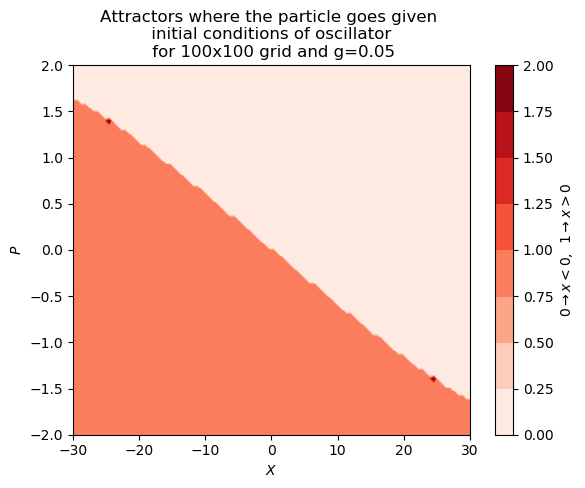

In [34]:
gg=g[2]
contourf(XX1,PP1,colors,cmap="Reds")
colorbar(label=L"$0\rightarrow x<0$,  $1\rightarrow x>0$")
xlabel(L"$X$")
ylabel(L"$P$")
title("Attractors where the particle goes given \n initial conditions of oscillator \n for 100x100 grid and g=$gg")
#savefig("g0-05particle_sides.png",bbox_inches="tight")
savefig("attractor_McAte4.png",bbox_inches="tight")
#savefig("g0-05particle_sides.pdf",bbox_inches="tight")
#matshow(colors)
#xticks(range(-30,stop=(30),length=(10)))
#yticks(range(-2,stop=(2),length=(10)))
#colorbar()

In [9]:
PyPlot.pygui(false)

false

In [8]:
r=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
r=reshape(r,(4,4))

4×4 Array{Int64,2}:
 1  5   9  13
 2  6  10  14
 3  7  11  15
 4  8  12  16

In [9]:
r

4×4 Array{Int64,2}:
 1  5   9  13
 2  6  10  14
 3  7  11  15
 4  8  12  16

In [11]:
reverse(r,dims=1)

4×4 Array{Int64,2}:
 4  8  12  16
 3  7  11  15
 2  6  10  14
 1  5   9  13

# Gifs variando la constante de acople

In [49]:
grid_length=300
X1 = range(-50,stop=50,length=grid_length)
P1=range(-4,stop=4,length=grid_length)
grid=Iterators.product(X1,P1)
grid=collect.(grid)

function energia_poinc(x0, p0, m0, M0, a0, b0, H0)
    return (2. *M0*(H0-p0*p0/(2. *m0)+a*x0*x0/2. -b*x0*x0*x0*x0/4. ))^(1. /2. )
end

m=[1.,0.1]
w=[0.,0.7071]
g=[0.,0.05]
gs=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.9, 1., 2., 3.]
a=0.25
b=0.01
time=50.
dts=0.01*2. *pi/w[2]
tspan = (0,time)
initial_position = [0., 0.]
#initial_velocity = [-4./m[1], (-1. )^1. *energia_poinc(0.,-3.4957/m[1],m[1],m[2],a,b,Hinicial)/m[2]]
initial_momentum=[0. ,0.]

for II in range(1,stop=length(gs),length=length(gs))
    colors=ones(length(grid))*1.
    II=Int(II)
    gg=gs[II]
    println("Estamos en II=$II")
    Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. +q[1]*gg*q[2]+ p[2]^2. /(2. *m[2]) +0.5*m[2]*w[2]^2. *q[2]^2.  
    pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
    qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)
    k=0.
    for I in range(1,stop=length(grid),length=length(grid))
        if I%1000==0
            println(I/length(grid))
        end
        #Hinicial=20.0
        initial_position[2]=grid[Int(I)][1]
        initial_momentum[2]=grid[Int(I)][2]
            
    
        prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
        sol3 = solve(prob, VerletLeapfrog(), dt=dts);
        k=sol3
        for i in range(1,stop=length(sol3[3,:])-1,length=length(sol3[3,:])-1)
            if sol3[3,Int(i)] < 6. && sol3[3,Int(i+1)] > 6.
                colors[Int(I)]=1.
                break
            elseif sol3[3,Int(i)] > -6. && sol3[3,Int(i+1)] < -6.
                colors[Int(I)]=0.
                break
            end
        end
    end
    colors=reshape(colors,(grid_length,grid_length))
    colors=colors'
    colors=reverse(colors,dims=1)
    XX1=zeros(length(grid[:]))
    PP1=zeros(length(grid[:]))
    for i in range(1, stop=length(grid[:]),length=length(grid[:]))
        XX1[Int(i)]=grid[Int(i)][1]
        PP1[Int(i)]=grid[Int(i)][2]
    end
    XX1=reshape(XX1,(grid_length,grid_length))
    PP1=reshape(PP1,(grid_length,grid_length))
    #colors=reshape(colors,(10,10))
    XX1=rotl90(XX1)
    PP1=rotl90(PP1)
    #colors=colors'
    num=lpad(II,3,"0")
    contourf(XX1,PP1,colors,cmap="Reds")
    colorbar(label=L"$0\rightarrow x<0$,  $1\rightarrow x>0$")
    xlabel(L"$X$")
    ylabel(L"$P$")
    title("Attractors where the particle goes given \n initial conditions of oscillator \n for $grid_length x $grid_length grid and g=$gg")
    savefig("gifs/attractors/attractor$num.png",bbox_inches="tight")
    clf()
end

Estamos en II=1
0.011111111111111112
0.022222222222222223
0.03333333333333333
0.044444444444444446
0.05555555555555555
0.06666666666666667
0.07777777777777778
0.08888888888888889
0.1
0.1111111111111111
0.12222222222222222
0.13333333333333333
0.14444444444444443
0.15555555555555556
0.16666666666666666
0.17777777777777778
0.18888888888888888
0.2
0.2111111111111111
0.2222222222222222
0.23333333333333334
0.24444444444444444
0.25555555555555554
0.26666666666666666
0.2777777777777778
0.28888888888888886
0.3
0.3111111111111111
0.32222222222222224
0.3333333333333333
0.34444444444444444
0.35555555555555557
0.36666666666666664
0.37777777777777777
0.3888888888888889
0.4
0.4111111111111111
0.4222222222222222
0.43333333333333335
0.4444444444444444
0.45555555555555555
0.4666666666666667
0.4777777777777778
0.4888888888888889
0.5
0.5111111111111111
0.5222222222222223
0.5333333333333333
0.5444444444444444
0.5555555555555556
0.5666666666666667
0.5777777777777777
0.5888888888888889
0.6
0.6111111111111112

0.1
0.1111111111111111
0.12222222222222222
0.13333333333333333
0.14444444444444443
0.15555555555555556
0.16666666666666666
0.17777777777777778
0.18888888888888888
0.2
0.2111111111111111
0.2222222222222222
0.23333333333333334
0.24444444444444444
0.25555555555555554
0.26666666666666666
0.2777777777777778
0.28888888888888886
0.3
0.3111111111111111
0.32222222222222224
0.3333333333333333
0.34444444444444444
0.35555555555555557
0.36666666666666664
0.37777777777777777
0.3888888888888889
0.4
0.4111111111111111
0.4222222222222222
0.43333333333333335
0.4444444444444444
0.45555555555555555
0.4666666666666667
0.4777777777777778
0.4888888888888889
0.5
0.5111111111111111
0.5222222222222223
0.5333333333333333
0.5444444444444444
0.5555555555555556
0.5666666666666667
0.5777777777777777
0.5888888888888889
0.6
0.6111111111111112
0.6222222222222222
0.6333333333333333
0.6444444444444445
0.6555555555555556
0.6666666666666666
0.6777777777777778
0.6888888888888889
0.7
0.7111111111111111
0.7222222222222222
0.7

0.2
0.2111111111111111
0.2222222222222222
0.23333333333333334
0.24444444444444444
0.25555555555555554
0.26666666666666666
0.2777777777777778
0.28888888888888886
0.3
0.3111111111111111
0.32222222222222224
0.3333333333333333
0.34444444444444444
0.35555555555555557
0.36666666666666664
0.37777777777777777
0.3888888888888889
0.4
0.4111111111111111
0.4222222222222222
0.43333333333333335
0.4444444444444444
0.45555555555555555
0.4666666666666667
0.4777777777777778
0.4888888888888889
0.5
0.5111111111111111
0.5222222222222223
0.5333333333333333
0.5444444444444444
0.5555555555555556
0.5666666666666667
0.5777777777777777
0.5888888888888889
0.6
0.6111111111111112
0.6222222222222222
0.6333333333333333
0.6444444444444445
0.6555555555555556
0.6666666666666666
0.6777777777777778
0.6888888888888889
0.7
0.7111111111111111
0.7222222222222222
0.7333333333333333
0.7444444444444445
0.7555555555555555
0.7666666666666667
0.7777777777777778
0.7888888888888889
0.8
0.8111111111111111
0.8222222222222222
0.83333333

0.3
0.3111111111111111
0.32222222222222224
0.3333333333333333
0.34444444444444444
0.35555555555555557
0.36666666666666664
0.37777777777777777
0.3888888888888889
0.4
0.4111111111111111
0.4222222222222222
0.43333333333333335
0.4444444444444444
0.45555555555555555
0.4666666666666667
0.4777777777777778
0.4888888888888889
0.5
0.5111111111111111
0.5222222222222223
0.5333333333333333
0.5444444444444444
0.5555555555555556
0.5666666666666667
0.5777777777777777
0.5888888888888889
0.6
0.6111111111111112
0.6222222222222222
0.6333333333333333
0.6444444444444445
0.6555555555555556
0.6666666666666666
0.6777777777777778
0.6888888888888889
0.7
0.7111111111111111
0.7222222222222222
0.7333333333333333
0.7444444444444445
0.7555555555555555
0.7666666666666667
0.7777777777777778
0.7888888888888889
0.8
0.8111111111111111
0.8222222222222222
0.8333333333333334
0.8444444444444444
0.8555555555555555
0.8666666666666667
0.8777777777777778
0.8888888888888888
0.9
0.9111111111111111
0.9222222222222223
0.9333333333333

┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.011111111111111112


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.022222222222222223


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.03333333333333333


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.044444444444444446


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.05555555555555555


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.06666666666666667


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339


0.07777777777777778


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.08888888888888889


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.1


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.1111111111111111


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.12222222222222222


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.13333333333333333


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.14444444444444443


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339


0.15555555555555556


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.16666666666666666


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.17777777777777778


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.18888888888888888


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.2


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.2111111111111111


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.2222222222222222


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.23333333333333334


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.24444444444444444


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.25555555555555554


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.26666666666666666


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.2777777777777778


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.28888888888888886


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.3


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.3111111111111111


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.32222222222222224


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.3333333333333333


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.34444444444444444


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.35555555555555557


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.36666666666666664


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.37777777777777777


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.3888888888888889


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.4


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.4111111111111111


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.4222222222222222


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.43333333333333335


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.4444444444444444


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.45555555555555555


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.4666666666666667


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.4777777777777778


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.4888888888888889


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.5


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.5111111111111111


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.5222222222222223


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.5333333333333333


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.5444444444444444


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.5555555555555556


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.5666666666666667


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.5777777777777777


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.5888888888888889


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.6


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.6111111111111112


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.6222222222222222


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.6333333333333333


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.6444444444444445


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.6555555555555556


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.6666666666666666


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.6777777777777778


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.6888888888888889


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.7


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.7111111111111111


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.7222222222222222


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.7333333333333333


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.7444444444444445


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.7555555555555555


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.7666666666666667


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.7777777777777778


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.7888888888888889


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.8


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.8111111111111111


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.8222222222222222


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.8333333333333334


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.8444444444444444


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.8555555555555555


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339


0.8666666666666667


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

0.8777777777777778


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339


0.8888888888888888


┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting
└ @ DiffEqBase /home/santiago/.julia/packages/DiffEqBase/mDFok/src/integrator_interface.jl:339
┌ Warning: Instability detected. Aborting

In [40]:
lpad(2,3,"0")

"002"